Notes:
Simulation with 1000 agents takes appx. 40 seconds.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In this notebook we present descriptive statistics of a series of simulated samples with the soepy toy model.

soepy is closely aligned to the model in Blundell (2016). Therefore, we first discuss a specification of the model, in which the parameter values are set close to the parameters estimated in the seminal paper. We refer to this specificattion as the Blundell benchmark specification.
- the constants in the wage process gamma_0 equal the coefficient values on b0, Blundell Table VIII, p. 1733
- the returns to experience in the wage process gamma_1 equal the coefficient values on gamma0, Blundell Table VIII, p. 1733
- the part-time experience accumulation parameter equals the coefficient on g(P), Blundell Table VIII, p. 1733,
- the experience depreciation parameter delta equals the coefffient values on delta, Blundell Table VIII, p. 1733,
- the disutility of part-time work parameter theta_p is rough average of the part-time coefficient values in Blundell Table IX, p. 1734,
- the disutility of full-time work parameter theta_f is rough average of the full-time coefficient values in Blundell Table IX, p. 1734

To ensure that some individuals also choose to be non-emplyed, we set the period wage for nonemployed to be equal to some fixed value, constant over all periods. We call this income in unemployments "benefits".

In [2]:
data_frame_baseline = pd.read_csv('toy_model_sim_benchmark.csv', sep = '\t')

In [3]:
data_frame_baseline

,Identifier,Period,Identifier.1,Period.1,Years of Education,Choice,Systematic Wage,Period Wage N,Period Wage P,Period Wage F,Consumption Utility N,Consumption Utility P,Consumption Utility F,Flow Utility N,Flow Utility P,Flow Utility F
0,0,0,0,0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,0,1,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,2,0,2,12,2.0,60.338280,34.767751,10.668826,105.444690,-0.026436,-0.093997,-0.017149,-0.026436,-0.085052,-0.012704
3,0,3,0,3,12,1.0,117.237278,238.208827,251.931488,26.493529,-0.026436,-0.016001,-0.037168,-0.026436,-0.014478,-0.027535
4,0,4,0,4,12,2.0,122.699581,46.079471,92.429915,31.352986,-0.026436,-0.028055,-0.033823,-0.026436,-0.025385,-0.025057
5,0,5,0,5,12,2.0,179.598579,104.239745,338.186402,2886.161473,-0.026436,-0.013569,-0.002688,-0.026436,-0.012277,-0.001991
6,0,6,0,6,12,2.0,236.497577,988.458842,2928.229835,995.560678,-0.026436,-0.004051,-0.004878,-0.026436,-0.003665,-0.003613
7,0,7,0,7,12,2.0,293.396575,224.235807,177.437375,427.740954,-0.026436,-0.019471,-0.007828,-0.026436,-0.017618,-0.005799
8,0,8,0,8,12,2.0,350.295573,474.395234,180.296965,111.388486,-0.026436,-0.019298,-0.016630,-0.026436,-0.017461,-0.012320
9,0,9,0,9,12,2.0,407.194571,213.480904,289.137405,150.253516,-0.026436,-0.014813,-0.014064,-0.026436,-0.013403,-0.010419


In [4]:
# Set period wage for non-employment equal to the benefits value set in the model spcification
data_frame_baseline['Period Wage N'] = 1850

Descriptive statistics to look at:
- average part-time, full-time and nonemployment rate - ideally close to population rates, 70%, 27%, 3%
- frequency of each choice per period - ideally more often part-time in early periods, more full-time in later periods
- frequency of each choice over all periods for individuals with different levels of education - ideally, lower educated more often unemployed and in part-time jobs
- average period wages over all individuals - series for all periods
- average period individuals over all individuals - series for all periods

2.0    0.751747
1.0    0.219171
0.0    0.029081
Name: Choice, dtype: float64

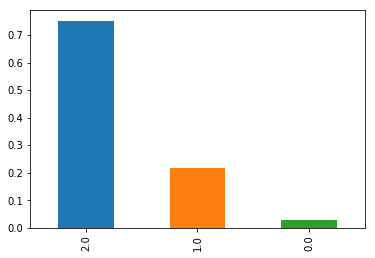

In [5]:
# Average non-employment, part-time, and full-time rates over all periods and individuals
data_frame_baseline['Choice'].value_counts(normalize=True).plot(kind = 'bar')
data_frame_baseline['Choice'].value_counts(normalize=True)

In the baseline model, the rate of non-employed over all individuals and periods is 2,9%. The part-time and full-time employment rates equal 21,9% and 75,2% respectively.

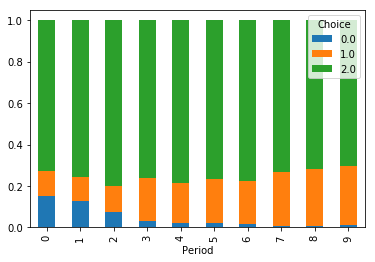

In [6]:
# Average non-employment, part-time, and full-time rates per period
data_frame_baseline.groupby(['Period'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

As far as the evolution of choices over all agents and periods is concerned, we first observe a declining tendency of individuals to be unemployed as desired in a perfectly calibrated simulation. Second, individuals in our Blundell benchmark simulation tend to choose full-time employment less often in the last three periods of the model. Rates of part-time employment increase for the same period. 

For a perfect calibration, full-time employment should stay roughly constant, while part-time employment should slightly decrease over time. Yet, it has to be noted that the described ideal evolution of agents' experiences might be difficult to achieve in the final periods of a ten period model. It is to be expected that the rates of part-time employment increase towards the end of the time modelled: since agents will only continue working for a few more periods, accumulation of experience through full-time employment becomes less attractive and, thus, choosing full-time employment becomes less frequent.

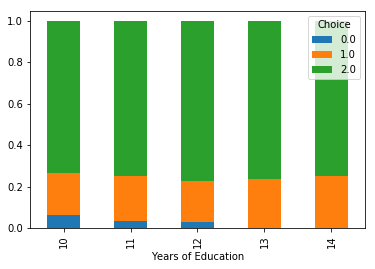

In [7]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
data_frame_baseline.groupby(['Years of Education'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

As should be expected, the higher the education level of the individuals the lower the observed.

We note a higher level of part-time employment than desired in an ideal callibration among individuals with high level of education (13 qnd 14 years).

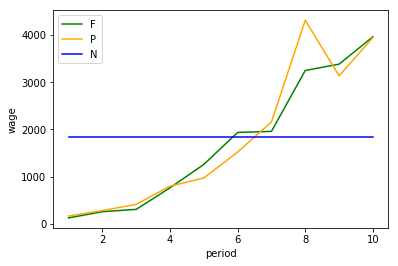

In [8]:
# Average wage for each period and choice
fig,ax = plt.subplots()

# Generate x axes values
period = [1,2,3,4,5,6,7,8,9,10]

# Generate plot lines
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 2].groupby(['Period'])['Period Wage F'].mean(),
        color='green', label = 'F')
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 1].groupby(['Period'])['Period Wage P'].mean(),
        color='orange', label = 'P')
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 0].groupby(['Period'])['Period Wage N'].mean(), 
        color='blue', label = 'N')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("wage")
ax.legend(loc='best')


The period wage of non-employment actually refers to the unemployment benefits individuals receive. The amount of the benefits is constant over time. Part-time and full-time wages rise as individuals gather more experience. However, in an idally calibrated simulation, part-time wages would need to grow more slowly compared to the Blundell benchmark model. 

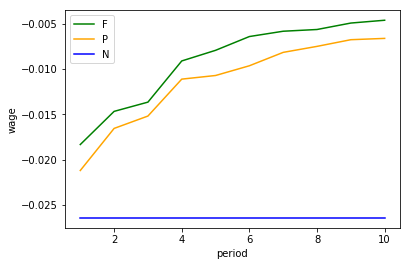

In [9]:
# Average flow utility for each period and choice

fig,ax = plt.subplots()

# Generate x axis values
period = [1,2,3,4,5,6,7,8,9,10]

# Generate lines
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 2].groupby(['Period'])['Flow Utility F'].mean(),
        color='green', label = 'F')
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 1].groupby(['Period'])['Flow Utility P'].mean(),
        color='orange', label = 'P')
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 0].groupby(['Period'])['Flow Utility N'].mean(), 
        color='blue', label = 'N')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("wage")
ax.legend(loc='best')

As expected, average flow utility of full-time employment is higher than the average flow utility of part-time employment. The flow utility of nonemployment is constant and lowest.

In the following, we discuss some comparative statics of the model.

While changing other parameter values we wish to assume that the parameters central to the part-time penalty phenomenon studied in Blundell (2016) stay the same as in the benchmark specification:
- part-time experience accumulation g_s1,2,3
- experience depreciation delta

Comparative statics:

Parameters in the systematic wage govern the choice between employment (either part-time, or full-time) and nonemployment. They do not determine the choice between part-time and full-time employment since the systematic wage is equal for both options.
- constnat in wage process gamma_0: lower/higher value of the coefficient implies that other components such as accumulated work experience and the productivity shock are relatively more/less important in determining the choice between employment and nonemployment. Decreasing the constant for individuals of a certain education level, e.g., low, results in these individuals choosing nonemployment more often.
- return to experience gamma_1: lower value of the coefficient implies that accumulated work experience is less relevant in determining the wage in comparison to other factors such as the constant or the productivity shock. Higher coefficients should lead to agents persistently choosing employment versus non-employment.

The productivity shock:
- productivity shock variances - the higher the variances, the more switching between occupational alternatives.

Risk aversion:
- risk aversion parameter mu: the more negative the risk aversion parameter, the more eager are agents to ensure themselves against productivity shoks through accumulation of experience. Therefore, lower values of the parameter are associated with higher rates of full-time employment.

The labor disutility parameters directly influence:
- benefits - for higher benefits individuals of all education levels would choose non-employment more often
- labor disutility for part-time theta_p - for a higher coefficient, individuals of all education levels would choose to work part-time more often
- labor disutility for full-time theta_f - for a higher coefficient, individuals of all education levels would choose to work part-time more often

Finally, we illustrate one of the changes discussed above. In the alternative specifications the return to experience coefficient gamma_1 for the individuals with medium level of educations is increased from 0.229 to 0.280. As a result, experience accumulation matters more in the utility maximization. Therefore, individuals with medium level of education choose to be employed more often. Consequently, also aggregate levels of nonemployment are lower in the model.

In [13]:
data_frame_alternative = pd.read_csv('toy_model_sim_test_alternative.csv', sep = '\t')

In [14]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
[data_frame_alternative.groupby(['Years of Education'])['Choice'].value_counts(normalize=True),
data_frame_baseline.groupby(['Years of Education'])['Choice'].value_counts(normalize=True)]

[Years of Education  Choice
 10                  2.0       0.733498
                     1.0       0.202463
                     0.0       0.064039
 11                  2.0       0.755124
                     1.0       0.221143
                     0.0       0.023732
 12                  2.0       0.777933
                     1.0       0.201816
                     0.0       0.020251
 13                  2.0       0.760842
                     1.0       0.239158
 14                  2.0       0.749113
                     1.0       0.250887
 Name: Choice, dtype: float64, Years of Education  Choice
 10                  2.0       0.733498
                     1.0       0.202463
                     0.0       0.064039
 11                  2.0       0.749191
                     1.0       0.218986
                     0.0       0.031823
 12                  2.0       0.773045
                     1.0       0.196229
                     0.0       0.030726
 13                  2.0       0.7

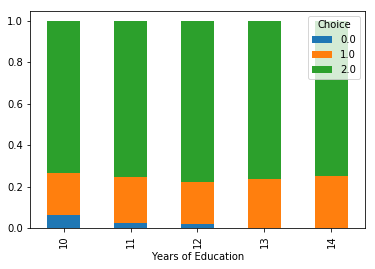

In [15]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
data_frame_alternative.groupby(['Years of Education'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

2.0    0.753994
1.0    0.220669
0.0    0.025337
Name: Choice, dtype: float64

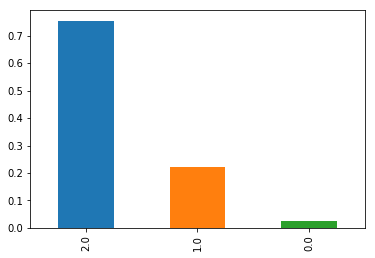

In [17]:
# Average non-employment, part-time, and full-time rates over all periods and individuals
data_frame_alternative['Choice'].value_counts(normalize=True).plot(kind = 'bar')
data_frame_alternative['Choice'].value_counts(normalize=True)